# Reddit Data Collection and Analysis with PSAW

To collect Reddit data, we're going to use the [Pushift API](https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/), specifically a Python wrapper for the Pushshift API called [PSAW](https://github.com/dmarx/psaw) (PushShift API Wrapper). Why are we using the Pushshift API instead of the official Reddit API, and PSAW instead of Pushshift itself?

Well, as Pushshift's creator Jason Baumgartner and his co-authors describe it in their [published paper](https://arxiv.org/pdf/2001.08435.pdf), "Pushshift makes it
much easier for researchers to query and retrieve historical Reddit data, provides extended functionality by providing fulltext search against comments and submissions, and has larger single query limits." PSAW, meanwhile, makes it easier to work with Pushshift and provides better documentation.

## Install PSAW

To use PSAW, we first need to install it.

In [ ]:
!pip install psaw

Then we will import pandas for eventually working with the collected data, and we will change pandas default display setting to make our DataFrame columns wider.

In [5]:
import pandas as pd
pd.options.display.max_colwidth = 200
pd.options.display.max_cols = 50

Next we will import the PushshiftAPI from psaw and initialize it.

In [6]:
from psaw import PushshiftAPI

# Initialize PushShift
api = PushshiftAPI()

## Collect Reddit Posts (By Subreddit)

To collect Reddit posts, we will use `api.search_submissions()` and then establish the parameters of our query, such as which subreddit we want to search in and what threshold of upvote score we want to set.

Below we are setting up to search for posts in the subreddit "AmITheAsshole" that have an upvote score of at least 2,000 or more.

In [7]:
api_request_generator = api.search_submissions(subreddit='AmITheAsshole',
                                               score = ">2000")

Once this generator is set up, we can use it to collect Reddit posts. The code below is a list comprehension that loops through the generator and extracts relevant data for each matching Reddit post. It then turns that list into a Pandas DataFrame.

In [8]:
aita_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/melwalsh/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


*The cell above should take a while to run. It's searching through Reddit's entire history. It's ok if you periodically get errors while it's running.*

In [ ]:
aita_submissions

To get a quick peak of the data, we can look at 10 random rows of data, and only for the columns "title" and upvote "score."

In [ ]:
aita_submissions[['title', 'score']].sample(10)

## Pick Another Subreddit

In [7]:
api_request_generator = api.search_submissions(subreddit='#Your Choice Here',
                                               score = ">2000")

Once this generator is set up, we can use it to collect Reddit posts. The code below is a list comprehension that loops through the generator and extracts relevant data for each matching Reddit post. It then turns that list into a Pandas DataFrame.

In [8]:
reddit_df  = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/melwalsh/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


*The cell above should take a while to run. It's searching through Reddit's entire history. It's ok if you periodically get errors while it's running.*

To get a quick peak of the data, we can look at 10 random rows of data, and only for the columns "title" and upvote "score."

In [ ]:
reddit_df[['title', 'score']].sample(10)

## Collect Reddit Posts (By Keyword)

What are the top subreddits for a given keyword?

To search by a keyword, we will add `q=` and insert a query phrase.

In [16]:
api_request_generator = api.search_submissions(q='#Your Choice Here'', score = ">2000")

Once this generator is set up, we can use it to collect Reddit posts. The code below is a list comprehension that loops through the generator and extracts relevant data for each matching Reddit post. It then turns that list into a Pandas DataFrame.

In [17]:
reddit_df = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/melwalsh/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


*The cell above should take a while to run. It's searching through Reddit's entire history. It's ok if you periodically get errors while it's running.*

Now make a plot of the top 5 subreddits for the keyword that you chose.

<AxesSubplot:title={'center':'Top Subreddits for the "Missy Elliott"'}>

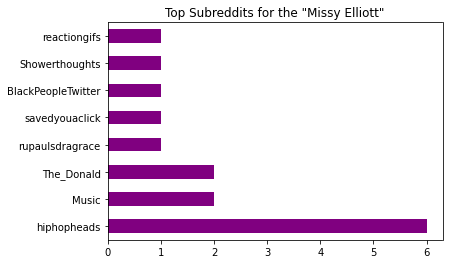

In [33]:
# Your code here




